Price Predictions

PP create model

**IMPORTANT: Make sure you do not skip any cells. In that case you risk not being able to accomplish given tasks.** 


In [1]:
import warnings
warnings.filterwarnings('ignore')

## Price Predictions Data Cleaning 

In [2]:
#Price Predictions dataset merged with the folow entries

# 483737 train.csv
#  21257 test.csv

In [3]:
import sys
print(sys.executable) #check if your jupyter is running from right env

/Users/friesco/.local/share/virtualenvs/pp-sandbox-KSKYKDwW/bin/python


### Load libraries and data

In [4]:
# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd
from pandas import DataFrame
from pandas import Grouper as TimeGrouper

# Matplotlib for visualization
from matplotlib import pyplot as plt

# Display plots in the notebook
%matplotlib inline 

# Seaborn for easier visualization
import seaborn as sns

In [5]:
# Load data from CSV
train_dataset = pd.read_csv("static/data/train.csv", dtype={'zip':'category', 'mlsnum':'string', 'proptype':'string'})
test = pd.read_csv("static/data/test.csv",  dtype={'zip':'category', 'mlsnum':'string','proptype':'string'})

train_dataset.head()

,mlsnum,status,listprice,soldprice,listdate,solddate,expireddate,dom,dto,address,...,elementaryschool,juniorhighschool,highschool,otherfeatures,proptype,streetname,housenum1,housenum2,photourl,row_id
0,72250837,72250837,249900.0,NaN,NaN,11/2/2017,NaN,110,NaN,10 Cove Road,...,NaN,NaN,NaN,Basement:Yes;Fireplaces:0;Roof:Asphalt/Fibergl...,SF,SF,NaN,10.0,10,7a93a522-3ce1-11ec-be06-acde48001122
1,72097812,72097812,589900.0,NaN,NaN,11/21/2016,NaN,456,NaN,2 HUMMINGBIRD LANE,...,NaN,NaN,NaN,"Basement:Yes;Fireplaces:1;Roof:--;Floor:Tile, ...",SF,SF,NaN,2.0,2,7a93a6da-3ce1-11ec-be06-acde48001122
2,72255021,72255021,299000.0,NaN,NaN,11/13/2017,NaN,99,NaN,130 Farm Lane,...,NaN,NaN,NaN,Basement:Yes;Fireplaces:0;Roof:Asphalt/Fibergl...,SF,SF,NaN,130.0,130,7a93a734-3ce1-11ec-be06-acde48001122
3,72215404,72215404,219900.0,NaN,NaN,8/17/2017,NaN,211,NaN,124 Beech St,...,NaN,NaN,NaN,NaN,MF,MF,NaN,124.0,124,7a93a838-3ce1-11ec-be06-acde48001122
4,72245726,72245726,169900.0,NaN,NaN,10/20/2017,NaN,123,NaN,6 Harvey Lane,...,NaN,NaN,NaN,Basement:Yes;Fireplaces:0;Roof:Asphalt/Fibergl...,SF,SF,NaN,6.0,6,7a93a9a0-3ce1-11ec-be06-acde48001122


In [6]:
print(test.proptype.unique())
print(train_dataset.proptype.unique())

<StringArray>
['CC', 'MF', 'SF', 'EXT']
Length: 4, dtype: string
<StringArray>
['SF', 'MF', 'CC', 'EXT']
Length: 4, dtype: string


In [7]:
# print(test.columns)
# print(len(test.columns))

In [9]:
list1_as_set = set(train_dataset.columns)
intersection = list1_as_set.intersection(test.columns)
intersection_as_list = list(intersection)
print(intersection_as_list)
print(len(intersection_as_list))
drop_list = list(set(list1_as_set) - set(test.columns))
drop_list

['otherfeatures', 'status', 'solddate', 'city', 'showinginstructions', 'garage', 'address', 'agentname', 'listdate', 'cooling', 'dom', 'soldprice', 'level', 'housenum1', 'mlsnum', 'baths', 'officename', 'style', 'expireddate', 'area', 'elementaryschool', 'zip', 'sqft', 'officephone', 'listprice', 'beds', 'highschool', 'heating', 'juniorhighschool', 'dto', 'age', 'remarks', 'photourl', 'row_id', 'proptype', 'state', 'streetname', 'housenum2', 'lotsize']
39


[]

In [10]:
train_dataset['zip'] = train_dataset['zip'].astype(str).str.zfill(5)
test['zip'] = test['zip'].astype(str).str.zfill(5)
train_dataset['mlsnum'] = train_dataset['mlsnum'].astype(str).str.zfill(5)
test['mlsnum'] = test['mlsnum'].astype(str).str.zfill(5)

In [12]:
# YOUR CODE GOES HERE
# Chech out the shape of the datasets. 
# We have a lot of data observations to play around.

train_dataset.shape, test.shape

((500468, 39), (13346, 39))

Take a look and understand different data types.

In [13]:
# Column datatypes
# print(train_dataset.dtypes,'\n')
# print(test.dtypes)

### Drop unwanted observations

Our goal during the data cleaning phase is to fix any problems with the provided data sets, such as:

- Fix inconsistent data
- Replace missing data with reasonable values
- Remove Data that cannot be fixed
- Convert categorical variables to numeric values
- Check for outlying values, and correct them if necessary

We needed to fix these types of problems so that our prediction models could be fit as accurately as possible.

In [14]:
# Check for duplicates
train_dataset = train_dataset.drop_duplicates()
test = test.drop_duplicates()

# Print shape after removing duplicates
train_dataset.shape, test.shape

((500468, 39), (13346, 39))

There were no duplicates. Now, let us check closed stores, stores with no customers, and stores where sales values equals zero.

In [15]:
# your code
# your result shoud look like this: 

# train_dataset.mlsnum.fillna(0, inplace=true)
# train_dataset.status.fillna(0, inplace=true)
train_dataset.listprice.fillna(0, inplace=True)
#train_dataset.soldprice.fillna(0, inplace=true)
# train_dataset.listdate.fillna(0, inplace=true)
# train_dataset.solddate.fillna(0, inplace=true)
# train_dataset.expireddate.fillna(0, inplace=true)
# train_dataset.dom.fillna(0, inplace=true)
# train_dataset.dto.fillna(0, inplace=true)
# train_dataset.address.fillna(0, inplace=true)
# train_dataset.city.fillna(0, inplace=true)
# train_dataset.state.fillna(0, inplace=true)
# train_dataset.zip.fillna("", inplace=true)
train_dataset.area.fillna(0, inplace=True)
train_dataset.beds.fillna(0, inplace=True)
train_dataset.baths.fillna(0, inplace=True)
# train_dataset.sqft.fillna(0, inplace=true)
# train_dataset.age.fillna(0, inplace=true)
train_dataset.lotsize.fillna(0, inplace=True)
# train_dataset.agentname.fillna(0, inplace=true)
# train_dataset.officename.fillna(0, inplace=true)
# train_dataset.officephone.fillna(0, inplace=true)
# train_dataset.showinginstructions.fillna(0, inplace=true)
# train_dataset.remarks.fillna(0, inplace=true)
# train_dataset.style.fillna(0, inplace=true)
# train_dataset.level.fillna(0, inplace=true)
# train_dataset.garage.fillna(0, inplace=true)
# train_dataset.heating.fillna(0, inplace=true)
# train_dataset.cooling.fillna(0, inplace=true)
# train_dataset.elementaryschool.fillna(0, inplace=true)
# train_dataset.juniorhighschool.fillna(0, inplace=true)
# train_dataset.highschool.fillna(0, inplace=true)
# train_dataset.otherfeatures.fillna(0, inplace=true)
# train_dataset.proptype.fillna(0, inplace=true)
# train_dataset.streetname.fillna(0, inplace=true)
# train_dataset.housenum1.fillna(0, inplace=true)
# train_dataset.housenum2.fillna(0, inplace=true)
# train_dataset.photourl.fillna(0, inplace=true)

# test.mlsnum.fillna(0, inplace=true)
#test.listprice.fillna(0, inplace=true)
# test.listdate.fillna(0, inplace=true)
# test.address.fillna(0, inplace=true)
# test.city.fillna(0, inplace=true)
# test.state.fillna(0, inplace=true)
test.zip.fillna("", inplace=True)
# test.area.fillna(0, inplace=true)
test.beds.fillna(0, inplace=True)
test.baths.fillna(0, inplace=True)
# test.sqft.fillna(0, inplace=true)
# test.age.fillna(0, inplace=true)
test.lotsize.fillna(0, inplace=True)
# test.agentname.fillna(0, inplace=true)
# test.officename.fillna(0, inplace=true)
# test.officephone.fillna(0, inplace=true)
# test.showinginstructions.fillna(0, inplace=true)
# test.remarks.fillna(0, inplace=true)
# test.style.fillna(0, inplace=true)
# test.level.fillna(0, inplace=true)
# test.garage.fillna(0, inplace=true)
# test.heating.fillna(0, inplace=true)
# test.cooling.fillna(0, inplace=true)
# test.elementaryschool.fillna(0, inplace=true)
# test.juniorhighschool.fillna(0, inplace=true)
# test.highschool.fillna(0, inplace=true)
# test.otherfeatures.fillna(0, inplace=true)
# test.proptype.fillna(0, inplace=true)
# test.streetname.fillna(0, inplace=true)
# test.housenum1.fillna(0, inplace=true)
# test.housenum2.fillna(0, inplace=true)
# test.photourl.fillna(0, inplace=true)

In [16]:
print(train_dataset.select_dtypes(include=['object']).isnull().sum(), '\n')
print(test.select_dtypes(include=['object']).isnull().sum())

mlsnum                      0
status                      0
listprice                   0
soldprice              336728
listdate               267862
solddate                68866
expireddate            364381
dto                    280399
address                     0
city                        0
state                       0
zip                         0
area                        0
age                         1
lotsize                     0
agentname                   0
officename                  0
officephone                 0
showinginstructions         0
remarks                   384
style                   45648
level                  166667
garage                      3
heating                 45664
cooling                500445
elementaryschool       327954
juniorhighschool       326983
highschool             308758
otherfeatures           45645
streetname                 26
photourl                  112
row_id                      0
dtype: int64 

mlsnum                   

In [17]:
test.shape

(13346, 39)

In [18]:
test.head()

,mlsnum,status,listprice,soldprice,listdate,solddate,expireddate,dom,dto,address,...,elementaryschool,juniorhighschool,highschool,otherfeatures,proptype,streetname,housenum1,housenum2,photourl,row_id
0,71759726,1,589000,NaN,10/21/2014,NaN,NaN,NaN,NaN,7 Russell Street,...,NaN,NaN,NaN,Basement:No;Fireplaces:1;Roof:Asphalt/Fibergla...,CC,Russell Street,7.0,7.0,http://media.mlspin.com/photo.aspx?mls=71759726,8a18290a-3ce1-11ec-be06-acde48001122
1,71759731,2,659000,NaN,10/21/2014,NaN,NaN,NaN,NaN,7 Russell Street,...,NaN,NaN,NaN,Basement:No;Fireplaces:1;Roof:Asphalt/Fibergla...,CC,Russell Street,7.0,7.0,http://media.mlspin.com/photo.aspx?mls=71759731,8a182cca-3ce1-11ec-be06-acde48001122
2,71783046,3,294900,NaN,1/12/2015,NaN,NaN,NaN,NaN,1 Junction Station,...,Woodland,Powdermill,Swk Tolland,Basement:Yes;Fireplaces:0;Roof:Asphalt/Fibergl...,CC,Junction Station,1.0,1.0,http://media.mlspin.com/photo.aspx?mls=71783046,8a182d06-3ce1-11ec-be06-acde48001122
3,71783100,4,235000,NaN,1/12/2015,NaN,NaN,NaN,NaN,12 Hesston Ter,...,NaN,NaN,NaN,Basement:Yes;Fireplaces:0;Roof:--;Floor:--;App...,CC,Hesston Ter,12.0,12.0,http://media.mlspin.com/photo.aspx?mls=71783100,8a182d24-3ce1-11ec-be06-acde48001122
4,71794633,5,619000,NaN,2/23/2015,NaN,NaN,NaN,NaN,7 Russell Street,...,NaN,NaN,NaN,Basement:No;Fireplaces:1;Roof:Asphalt/Fibergla...,CC,Russell Street,7.0,7.0,http://media.mlspin.com/photo.aspx?mls=71794633,8a182d42-3ce1-11ec-be06-acde48001122


### Feature engineering

In [19]:
# Summarize numerical features
train_dataset.describe()

,dom,beds,baths,sqft,housenum1,housenum2
count,500468.000000,500468.000000,500468.000000,500468.000000,9.608300e+04,4.925790e+05
mean,100.455182,3.455734,2.149979,439.930151,2.255472e+04,2.071589e+04
std,164.846234,1.687806,1.239873,1220.818806,6.810874e+05,6.672493e+05
min,-9.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,16.000000,3.000000,1.000000,1.000000,1.600000e+01,1.700000e+01
50%,42.000000,3.000000,2.000000,2.000000,4.900000e+01,4.900000e+01
75%,127.000000,4.000000,2.500000,4.000000,1.560000e+02,1.550000e+02
max,4172.000000,20.000000,15.000000,99999.000000,5.337534e+07,8.698691e+07


In [20]:

test.describe()

,status,listprice,soldprice,solddate,expireddate,dom,dto,beds,baths,sqft,age,garage,housenum1,housenum2
count,13346.000000,1.334600e+04,0.0,0.0,0.0,0.0,0.0,13346.000000,13346.000000,13346.000000,13335.000000,13344.000000,1.329900e+04,1.241800e+04
mean,1821.968755,5.184125e+05,NaN,NaN,NaN,NaN,NaN,3.392627,2.179380,2002.968455,62.392651,0.874775,4.794958e+04,2.758770e+03
std,1206.532034,6.223016e+05,NaN,NaN,NaN,NaN,NaN,1.936973,1.163532,1682.600913,53.223673,1.074032,1.050326e+06,2.902427e+05
min,1.000000,3.000000e+03,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,-263.000000,0.000000,0.000000e+00,0.000000e+00
25%,837.000000,2.499000e+05,NaN,NaN,NaN,NaN,NaN,2.000000,1.500000,1240.000000,20.000000,0.000000,1.800000e+01,1.800000e+01
50%,1671.000000,3.750000e+05,NaN,NaN,NaN,NaN,NaN,3.000000,2.000000,1728.000000,53.000000,1.000000,5.300000e+01,5.000000e+01
75%,2641.000000,5.750000e+05,NaN,NaN,NaN,NaN,NaN,4.000000,2.500000,2400.000000,101.000000,2.000000,1.710000e+02,1.440000e+02
max,4893.000000,1.350000e+07,NaN,NaN,NaN,NaN,NaN,20.000000,15.000000,99999.000000,1895.000000,47.000000,5.337534e+07,3.234364e+07


In [21]:
train_dataset.shape

(500468, 39)

In [22]:
test.shape

(13346, 39)

### Missing values of numerical features

Let us check for missing values and fill in any add indicator variable for missing data

In [23]:
# print(train_dataset.select_dtypes(exclude=['object']).isnull().sum(),'\n')
# print(test.select_dtypes(exclude=['object']).isnull().sum())

In [24]:
# test.isnull().sum()

### Categorical features cleaning

In [25]:
# Display unique values of 'basement'
# train_dataset.DOM.unique()
# train_dataset.STATUS.unique()
# train_dataset.BATHS.unique()
#print(train_dataset.style.unique())
#print(train_dataset.status.unique())

###### Question 5

Check missing values for categorical variables

### Joining the "Train" and "test" tables 

Before joining our tables, we need to set both of our table indexes. Let us set the test values as our new table indexes.

###### Question 6

In [26]:
# YOUR CODE
# Set index in train_dataset to corespond to the train_dataset['Store'] values
# Set index in stores to corespond to the stores['Store'] values
# Drop Store column in train_dataset

train_dataset.index = train_dataset['row_id']
test.index = test['row_id']


In [27]:
train_set = train_dataset.drop(drop_list, axis=1)

In [28]:
print(train_set.columns)

Index(['mlsnum', 'status', 'listprice', 'soldprice', 'listdate', 'solddate',
       'expireddate', 'dom', 'dto', 'address', 'city', 'state', 'zip', 'area',
       'beds', 'baths', 'sqft', 'age', 'lotsize', 'agentname', 'officename',
       'officephone', 'showinginstructions', 'remarks', 'style', 'level',
       'garage', 'heating', 'cooling', 'elementaryschool', 'juniorhighschool',
       'highschool', 'otherfeatures', 'proptype', 'streetname', 'housenum1',
       'housenum2', 'photourl', 'row_id'],
      dtype='object')


In [29]:
frames = [train_set, test]
df_combined = pd.concat(frames)
df_combined = df_combined.reset_index(drop=True)
df_combined.head()

,mlsnum,status,listprice,soldprice,listdate,solddate,expireddate,dom,dto,address,...,elementaryschool,juniorhighschool,highschool,otherfeatures,proptype,streetname,housenum1,housenum2,photourl,row_id
0,72250837,72250837,249900.0,NaN,NaN,11/2/2017,NaN,110.0,NaN,10 Cove Road,...,NaN,NaN,NaN,Basement:Yes;Fireplaces:0;Roof:Asphalt/Fibergl...,SF,SF,NaN,10.0,10,7a93a522-3ce1-11ec-be06-acde48001122
1,72097812,72097812,589900.0,NaN,NaN,11/21/2016,NaN,456.0,NaN,2 HUMMINGBIRD LANE,...,NaN,NaN,NaN,"Basement:Yes;Fireplaces:1;Roof:--;Floor:Tile, ...",SF,SF,NaN,2.0,2,7a93a6da-3ce1-11ec-be06-acde48001122
2,72255021,72255021,299000.0,NaN,NaN,11/13/2017,NaN,99.0,NaN,130 Farm Lane,...,NaN,NaN,NaN,Basement:Yes;Fireplaces:0;Roof:Asphalt/Fibergl...,SF,SF,NaN,130.0,130,7a93a734-3ce1-11ec-be06-acde48001122
3,72215404,72215404,219900.0,NaN,NaN,8/17/2017,NaN,211.0,NaN,124 Beech St,...,NaN,NaN,NaN,NaN,MF,MF,NaN,124.0,124,7a93a838-3ce1-11ec-be06-acde48001122
4,72245726,72245726,169900.0,NaN,NaN,10/20/2017,NaN,123.0,NaN,6 Harvey Lane,...,NaN,NaN,NaN,Basement:Yes;Fireplaces:0;Roof:Asphalt/Fibergl...,SF,SF,NaN,6.0,6,7a93a9a0-3ce1-11ec-be06-acde48001122


In [30]:
df_combined.shape

(513814, 39)

In [31]:
df_combined.proptype.fillna('EXT', inplace=True)
df_combined.age.fillna(0, inplace=True)
df_combined.photourl.fillna('404', inplace=True)


In [32]:
print(df_combined
      .select_dtypes(include=['object'])
      .isnull().sum())

mlsnum                      0
status                      0
listprice                   0
soldprice              350074
listdate               267862
solddate                82212
expireddate            377727
dto                    293745
address                     0
city                        0
state                       0
zip                         0
area                    10295
age                         0
lotsize                     0
agentname                   0
officename                  0
officephone                 0
showinginstructions         0
remarks                   441
style                   47746
level                  171859
garage                      5
heating                 47763
cooling                513788
elementaryschool       337409
juniorhighschool       336377
highschool             317643
otherfeatures           47743
streetname                 26
photourl                    0
row_id                      0
dtype: int64


### Create Binary Variables for open answer

In [451]:
df_combined['hasotherfeatures'] = np.where(df_combined['otherfeatures'].isnull(), 0, 1)
df_combined['hasproptype'] = np.where(df_combined['proptype'].isnull(), 0, 1)
df_combined['hasstreetname'] = np.where(df_combined['streetname'].isnull(), 0, 1)
df_combined['hashousenum1'] = np.where(df_combined['housenum1'].isnull(), 0, 1)
df_combined['hashousenum2'] = np.where(df_combined['housenum2'].isnull(), 0, 1)

df_combined['hasagentname'] = np.where(df_combined['agentname'].isnull(), 0, 1)
df_combined['hasofficename'] = np.where(df_combined['officename'].isnull(), 0, 1)
df_combined['hasofficephone'] = np.where(df_combined['officephone'].isnull(), 0, 1)
df_combined['hasshowinginstructions'] = np.where(df_combined['showinginstructions'].isnull(), 0, 1)
df_combined['hasstyle'] = np.where(df_combined['style'].isnull() , 0, 1)
df_combined['haslevel'] = np.where(df_combined['level'].isnull(), 0, 1)

df_combined['hasgarage'] = np.where(df_combined['garage'].isnull(), 0, 1)
df_combined['hasheating'] = np.where(df_combined['heating'].isnull(), 0, 1)
df_combined['hascooling'] = np.where(df_combined['cooling'].isnull(), 0, 1)
df_combined['haselementaryschool'] = np.where(df_combined['elementaryschool'].isnull(), 0, 1)
df_combined['hasjuniorhighschool'] = np.where(df_combined['juniorhighschool'].isnull(), 0, 1)
df_combined['hashighschool'] = np.where(df_combined['highschool'].isnull(), 0, 1)

df_combined['haslistprice'] = np.where(df_combined['listprice'].isnull(), 0, 1)
df_combined['haslistdate'] = np.where(df_combined['listdate'].isnull(), 0, 1)
df_combined['hasaddress'] = np.where(df_combined['address'].isnull(), 0, 1)
df_combined['hascity'] = np.where(df_combined['city'].isnull(), 0, 1)
df_combined['hasstate'] = np.where(df_combined['state'].isnull(), 0, 1)
df_combined['hasarea'] = np.where(df_combined['area'].isnull(), 0, 1)

In [33]:
df_combined.columns

Index(['mlsnum', 'status', 'listprice', 'soldprice', 'listdate', 'solddate',
       'expireddate', 'dom', 'dto', 'address', 'city', 'state', 'zip', 'area',
       'beds', 'baths', 'sqft', 'age', 'lotsize', 'agentname', 'officename',
       'officephone', 'showinginstructions', 'remarks', 'style', 'level',
       'garage', 'heating', 'cooling', 'elementaryschool', 'juniorhighschool',
       'highschool', 'otherfeatures', 'proptype', 'streetname', 'housenum1',
       'housenum2', 'photourl', 'row_id'],
      dtype='object')

### Remove Columns with open answer to keep consistency 

In [34]:
df_combined.head()

,mlsnum,status,listprice,soldprice,listdate,solddate,expireddate,dom,dto,address,...,elementaryschool,juniorhighschool,highschool,otherfeatures,proptype,streetname,housenum1,housenum2,photourl,row_id
0,72250837,72250837,249900.0,NaN,NaN,11/2/2017,NaN,110.0,NaN,10 Cove Road,...,NaN,NaN,NaN,Basement:Yes;Fireplaces:0;Roof:Asphalt/Fibergl...,SF,SF,NaN,10.0,10,7a93a522-3ce1-11ec-be06-acde48001122
1,72097812,72097812,589900.0,NaN,NaN,11/21/2016,NaN,456.0,NaN,2 HUMMINGBIRD LANE,...,NaN,NaN,NaN,"Basement:Yes;Fireplaces:1;Roof:--;Floor:Tile, ...",SF,SF,NaN,2.0,2,7a93a6da-3ce1-11ec-be06-acde48001122
2,72255021,72255021,299000.0,NaN,NaN,11/13/2017,NaN,99.0,NaN,130 Farm Lane,...,NaN,NaN,NaN,Basement:Yes;Fireplaces:0;Roof:Asphalt/Fibergl...,SF,SF,NaN,130.0,130,7a93a734-3ce1-11ec-be06-acde48001122
3,72215404,72215404,219900.0,NaN,NaN,8/17/2017,NaN,211.0,NaN,124 Beech St,...,NaN,NaN,NaN,NaN,MF,MF,NaN,124.0,124,7a93a838-3ce1-11ec-be06-acde48001122
4,72245726,72245726,169900.0,NaN,NaN,10/20/2017,NaN,123.0,NaN,6 Harvey Lane,...,NaN,NaN,NaN,Basement:Yes;Fireplaces:0;Roof:Asphalt/Fibergl...,SF,SF,NaN,6.0,6,7a93a9a0-3ce1-11ec-be06-acde48001122


### Convert list columns to floats and it

In [35]:
df_combined['listprice'] =  df_combined['listprice'].replace(',','', regex=True).astype(float)
df_combined['listprice'] = df_combined['listprice'].astype('float32')
# df_combined['age'] = df_combined['age'].astype('float32')
# df_combined['lotsize'] = df_combined['lotsize'].astype('float32')
df_combined['baths'] = df_combined['baths'].astype('float32')
df_combined['beds'] = df_combined['beds'].astype('int')



In [36]:
df_combined['city'] = df_combined['city'].astype('string')
df_combined['state'] = df_combined['state'].astype('string') # category
df_combined['photourl'] = df_combined['photourl'].astype('string')
df_combined['zip'] = df_combined['zip'].astype('string')
df_combined.city.fillna("00000", inplace=True)
df_combined.zip.fillna("00000", inplace=True)
df_combined.state.fillna("NA", inplace=True)
df_combined.photourl.fillna("NA", inplace=True)
# keep these variables as original string for csv export 
df_combined['proptype_str'] = df_combined['proptype'].astype('string')
df_combined['zip_str'] =  df_combined['zip'].astype('string')

df_combined['listprice'] = pd.to_numeric(df_combined['listprice'], errors='ignore')
df_combined['beds'] = pd.to_numeric(df_combined['beds'], errors='ignore')
df_combined['baths'] = pd.to_numeric(df_combined['baths'], errors='ignore')
df_combined['sqft'] = pd.to_numeric(df_combined['sqft'], errors='ignore')
df_combined['zip'] = pd.to_numeric(df_combined['zip'], errors='ignore')

df_combined.listprice.fillna(0, inplace=True)
df_combined.zip.fillna(0, inplace=True)
df_combined.sqft.fillna(0, inplace=True)
df_combined.beds.fillna(0, inplace=True)
df_combined.baths.fillna(0, inplace=True)

df_combined.loc[df_combined.proptype == 'CC', 'proptype'] = '1'
df_combined.loc[df_combined.proptype == 'MF', 'proptype'] = '2'
df_combined.loc[df_combined.proptype == 'SF', 'proptype'] = '3'
df_combined.loc[df_combined.proptype == 'EXT', 'proptype'] = '4'
df_combined[df_combined.eq('00nan').any(1)]
df_combined.loc[df_combined['zip'] == '00nan', ['zip']] = 0
df_combined.loc[df_combined['zip'] == 'Centerville', ['zip']] = 0
df_combined['proptype'] = df_combined['proptype'].astype('int')

df_combined_original = df_combined

df_combined.dtypes

mlsnum                  object
status                  object
listprice              float32
soldprice               object
listdate                object
solddate                object
expireddate             object
dom                    float64
dto                     object
address                 object
city                    string
state                   string
zip                     object
area                    object
beds                     int64
baths                  float32
sqft                     int64
age                     object
lotsize                 object
agentname               object
officename              object
officephone             object
showinginstructions     object
remarks                 object
style                   object
level                   object
garage                  object
heating                 object
cooling                 object
elementaryschool        object
juniorhighschool        object
highschool              object
otherfea

In [37]:
df_combined.columns

Index(['mlsnum', 'status', 'listprice', 'soldprice', 'listdate', 'solddate',
       'expireddate', 'dom', 'dto', 'address', 'city', 'state', 'zip', 'area',
       'beds', 'baths', 'sqft', 'age', 'lotsize', 'agentname', 'officename',
       'officephone', 'showinginstructions', 'remarks', 'style', 'level',
       'garage', 'heating', 'cooling', 'elementaryschool', 'juniorhighschool',
       'highschool', 'otherfeatures', 'proptype', 'streetname', 'housenum1',
       'housenum2', 'photourl', 'row_id', 'proptype_str', 'zip_str'],
      dtype='object')

In [38]:
df_combined.to_csv('df_combined.csv', sep=',', encoding='utf-8')

In [39]:
new_drop_columns = [ 'status','listdate', 'address','area',
                    'agentname','officename', 'officephone', 
                    'showinginstructions', 'remarks', 'style',
                    'level', 'garage', 'heating', 'cooling', 
                    'elementaryschool', 'juniorhighschool', 
                    'highschool', 'otherfeatures', 'streetname', 
                    'housenum1', 'housenum2', 'mlsnum', 'soldprice', 'solddate',
                   'dom', 'dto', 'expireddate', 'age', 'lotsize', 
                    'mlsnum', 'row_id', 'proptype_str', 'zip_str',  'city','state', 'photourl']
df_combined.drop(new_drop_columns, axis=1, inplace=True)

In [40]:
print(df_combined
      .select_dtypes(include=['object'])
      .isnull().sum())



zip    0
dtype: int64


In [41]:
df_combined.columns

Index(['listprice', 'zip', 'beds', 'baths', 'sqft', 'proptype'], dtype='object')

In [42]:
df_combined_original.columns

Index(['listprice', 'zip', 'beds', 'baths', 'sqft', 'proptype'], dtype='object')

In [43]:

prices = df_combined['listprice'].astype('float32')
#prices.describe()
minimum_price = np.min(prices)

# TODO: Maximum price of the data
maximum_price = np.max(prices)
# Alternative using pandas
# maximum_price = prices.max()

# TODO: Mean price of the data
mean_price = np.mean(prices)
# Alternative using pandas
# mean_price = prices.mean()

# TODO: Median price of the data
median_price = np.nanmedian(prices)
# Alternative using pandas
# median_price = prices.median()

# TODO: Standard deviation of prices of the data
std_price = np.std(prices)
# Alternative using pandas 
# std_price = prices.std(ddof=0)

# There are other statistics you can calculate too like quartiles
first_quartile = np.nanpercentile(prices, 25)
third_quartile = np.nanpercentile(prices, 75)
inter_quartile = third_quartile - first_quartile

# Show the calculated statistics
print ("Statistics for Boston housing dataset:\n")
print ("Minimum price: ${:,.2f}".format(minimum_price))
print ("Maximum price: ${:,.2f}".format(maximum_price))
print ("Mean price: ${:,.2f}".format(mean_price))
print ("Median price ${:,.2f}".format(median_price))
print ("Standard deviation of prices: ${:,.2f}".format(std_price))
print ("First quartile of prices: ${:,.2f}".format(first_quartile))
print ("Second quartile of prices: ${:,.2f}".format(third_quartile))
print ("Interquartile (IQR) of prices: ${:,.2f}".format(inter_quartile))

Statistics for Boston housing dataset:

Minimum price: $1,000.00
Maximum price: $90,000,000.00
Mean price: $631,906.00
Median price $415,900.00
Standard deviation of prices: $1,073,829.25
First quartile of prices: $269,900.00
Second quartile of prices: $654,900.00
Interquartile (IQR) of prices: $385,000.00


In [44]:
beds = df_combined['beds']
beds.describe()
minimum_beds = np.min(beds)
maximum_beds = np.max(beds)

# TODO: Mean beds of the data
mean_beds = np.mean(beds)
# Alternative using pandas
# mean_beds = beds.mean()

# TODO: Median beds of the data
median_beds = np.nanmedian(beds)
# Alternative using pandas
# median_beds = beds.median()

# TODO: Standard deviation of beds of the data
std_beds = np.std(beds)
# Alternative using pandas 
# std_beds = beds.std(ddof=0)

# There are other statistics you can calculate too like quartiles
first_quartile = np.nanpercentile(beds, 25)
third_quartile = np.nanpercentile(beds, 75)
inter_quartile = third_quartile - first_quartile
print(median_beds)
# Show the calculated statistics
print ("Statistics for Boston housing dataset:\n")
print ("Minimum beds: {:,.2f}".format(minimum_beds))
print ("Maximum beds: {:,.2f}".format(maximum_beds))
print ("Mean beds: {:,.2f}".format(mean_beds))
print ("Median beds {:,.2f}".format(median_beds))
print ("Standard deviation of beds: {:,.2f}".format(std_beds))
print ("First quartile of beds: {:,.2f}".format(first_quartile))
print ("Second quartile of beds: {:,.2f}".format(third_quartile))
print ("Interquartile (IQR) of beds: {:,.2f}".format(inter_quartile))

3.0
Statistics for Boston housing dataset:

Minimum beds: 0.00
Maximum beds: 20.00
Mean beds: 3.45
Median beds 3.00
Standard deviation of beds: 1.69
First quartile of beds: 3.00
Second quartile of beds: 4.00
Interquartile (IQR) of beds: 1.00


In [45]:
baths = df_combined['baths']
baths.describe()
minimum_baths = np.min(baths)
maximum_baths = np.max(baths)

# TODO: Mean baths of the data
mean_baths = np.mean(baths)
# Alternative using pandas
# mean_baths = baths.mean()

# TODO: Median baths of the data
median_baths = np.nanmedian(baths)
# Alternative using pandas
# median_baths = baths.median()

# TODO: Standard deviation of baths of the data
std_baths = np.std(baths)
# Alternative using pandas 
# std_baths = baths.std(ddof=0)

# There are other statistics you can calculate too like quartiles
first_quartile = np.nanpercentile(baths, 25)
third_quartile = np.nanpercentile(baths, 75)
inter_quartile = third_quartile - first_quartile
print(median_baths)
# Show the calculated statistics
print ("Statistics for Boston housing dataset:\n")
print ("Minimum baths: {:,.2f}".format(minimum_baths))
print ("Maximum baths: {:,.2f}".format(maximum_baths))
print ("Mean baths: {:,.2f}".format(mean_baths))
print ("Median baths {:,.2f}".format(median_baths))
print ("Standard deviation of baths: {:,.2f}".format(std_baths))
print ("First quartile of baths: {:,.2f}".format(first_quartile))
print ("Second quartile of baths: {:,.2f}".format(third_quartile))
print ("Interquartile (IQR) of baths: {:,.2f}".format(inter_quartile))

2.0
Statistics for Boston housing dataset:

Minimum baths: 0.00
Maximum baths: 15.00
Mean baths: 2.15
Median baths 2.00
Standard deviation of baths: 1.24
First quartile of baths: 1.00
Second quartile of baths: 2.50
Interquartile (IQR) of baths: 1.50


### Convert store type and assortiman from char to int

Text(0, 0.5, 'List Price')

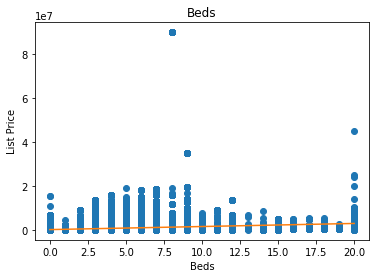

In [46]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1)
x = df_combined['beds']
y = prices
plt.plot(x, y, 'o')
# Create regression line
plt.plot(np.unique(x), 
         np.poly1d(np.polyfit(x, y, 1))
         (np.unique(x)))
plt.title("Beds")
plt.xlabel('Beds')
plt.ylabel('List Price')



In [47]:
# fig, ax = plt.subplots(1,1)
# x = df_combined['proptype']
# y = prices
# plt.plot(x, y, 'o')
# plt.title("Properties Types")
# plt.xlabel('Proptypes')
# plt.ylabel('List Price')



Text(0.5, 1.0, 'ListPrice')

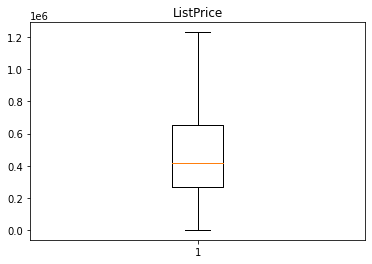

In [48]:
plt.boxplot(prices, showfliers=False)
plt.title("ListPrice")

Text(0.5, 1.0, 'Beds')

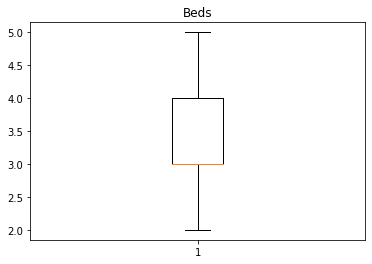

In [49]:
plt.boxplot(df_combined['beds'], showfliers=False)
plt.title("Beds")

Text(0.5, 1.0, 'Baths')

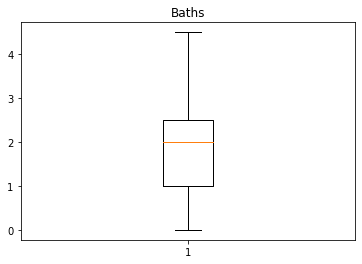

In [50]:
plt.boxplot(df_combined['baths'], showfliers=False)
plt.title("Baths")

Text(0.5, 1.0, 'sqft')

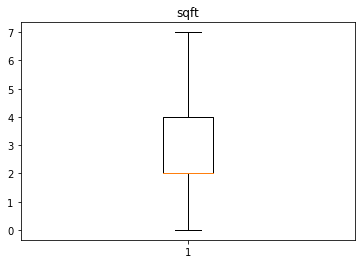

In [51]:
plt.boxplot(df_combined['sqft'], showfliers=False)
plt.title("sqft")

count    513814.000000
mean          2.150742
std           1.237957
min           0.000000
25%           1.000000
50%           2.000000
75%           2.500000
max          15.000000
Name: baths, dtype: float64

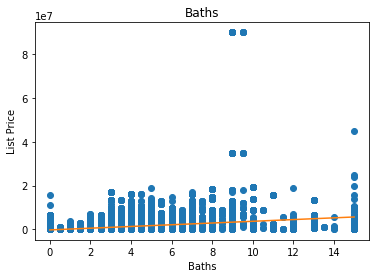

In [52]:
fig, ax = plt.subplots(1,1)
x = df_combined['baths']
y = prices
plt.plot(x, y, 'o')
# Create regression line
plt.plot(np.unique(x),
         np.poly1d(np.polyfit(x, y, 1))
         (np.unique(x)))
plt.title("Baths")
plt.xlabel('Baths')
plt.ylabel('List Price')

df_combined['baths'].describe()


Text(0, 0.5, 'List Price')

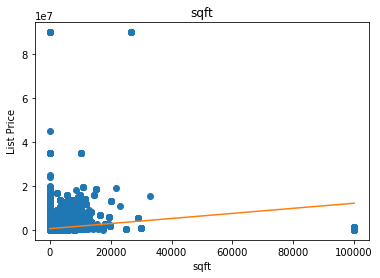

In [53]:
fig, ax = plt.subplots(1,1)
x = df_combined['sqft']
y = prices
plt.plot(x, y, 'o')
# Create regression line
plt.plot(np.unique(x),
         np.poly1d(np.polyfit(x, y, 1))
         (np.unique(x)))
plt.title("sqft")
plt.xlabel('sqft')
plt.ylabel('List Price')

In [54]:
# Calculate and show pairplot
# sns.pairplot(df_combined)
# plt.tight_layout()

In [55]:
# # Calculate and show correlation matrix
# cm = np.corrcoef(df_combined.values.T)
# sns.set(font_scale=1.5)
# hm = sns.heatmap(cm,
#                 cbar=True,
#                 annot=True,
#                 square=True,
#                 fmt='.2f',
#                 annot_kws={'size': 15},
#                 yticklabels=cols,
#                 xticklabels=cols)

In [56]:
# plt.hist(prices, density=True, bins=30)  # density=False would make counts
# plt.ylabel('Probability')
# plt.xlabel('List Price');
# hist, bins, _ = plt.hist(prices, bins=8)
# logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
# plt.subplot(212)
# plt.hist(x, bins=logbins)
# plt.xscale('log')
# plt.show()

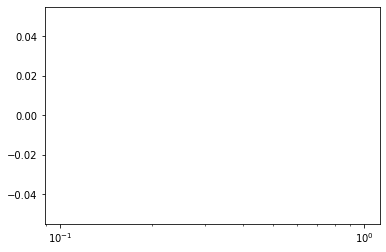

In [57]:
plt.hist(prices, bins=np.logspace(np.log10(0.1),np.log10(1.0), 50))
plt.gca().set_xscale("log")
plt.show()

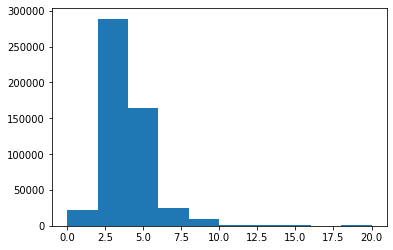

In [58]:
plt.hist(df_combined['beds'])
# pl.gca().set_xscale("log")
plt.show()

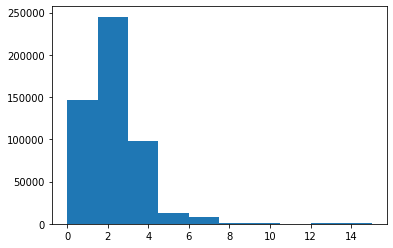

In [59]:
plt.hist(df_combined['baths'])
# pl.gca().set_xscale("log")
plt.show()

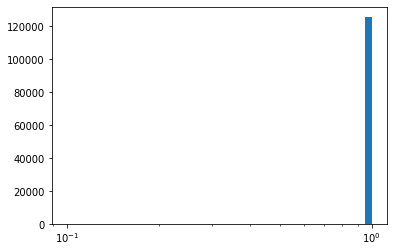

In [60]:
plt.hist(df_combined['sqft'], bins=np.logspace(np.log10(0.1),np.log10(1.0), 50))
plt.gca().set_xscale("log")
plt.show()

Convert Style

## EDA

To determine what type of models and predictors might work best for predicting house prices, we studied which factors are causing the most variance in sales.

#### Variations based on dataset  Attributes

In [61]:
# df_subset = df_combined # .head(100)
# sns.set(font_scale=2)
# fig, ax = plt.subplots(1,1,figsize=(10,10))
# p3 = sns.barplot(x='beds', y='listprice', data=df_subset, ax=ax)
# ax.set(xlabel='beds')
# ax.set_ylabel('listprice')
# ax.set_title('')
# plt.xticks(rotation=45, ha="right")

# plt.show()


In [62]:
# df_subset = df_combined # .head(100)
# sns.set(font_scale=2)
# fig, ax = plt.subplots(1,1,figsize=(12,12))
# p3 = sns.barplot(x='baths', y='listprice', data=df_subset, ax=ax)
# ax.set(xlabel='baths')
# ax.set_ylabel('listprice')
# ax.set_title('')
# plt.xticks(rotation=45, ha="right")

# plt.show()

#### Impact of Number of Customers

In [63]:
# sns.lmplot(x='beds', y='baths', data=df_combined, hue='proptype',fit_reg=False)


In [64]:
# sns.lmplot(x='beds', y='baths', data=df_combined, hue='listprice',fit_reg=False)

In [65]:
# g = sns.FacetGrid(df_combined, col="proptype")
# g.map(plt.scatter, "beds", "listprice")

## Property price Data Modeling

Due to the regressive predictive nature of The pp Project, we decided to approach our model methodology with a Linear Regression base model with feature selection. Note: you can also consider Ridge regression to evaluate the effects of regularization on the predictive performance. 

### Linear Regression


In the next section we will explore how different features affect overall score. You will be challenged to spot the differences and explain what given results mean.

#### Load libraries

In [66]:
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [67]:



# create tagret (Sales) variable 
target =  df_combined['listprice']

#### Linear Regression: *ver. 1*

In [68]:
# Drop Sales and AvgPurchasing, but leave Customers
drop_prices_df_combined =  df_combined.drop(['listprice'], axis=1)
drop_prices_df_combined.columns

# Split the data into train/test
X_train, X_test, y_train, y_test = train_test_split(drop_prices_df_combined, target, test_size=0.33)



In [69]:
# Create linear regression object
regr = linear_model.LinearRegression()
# X_train
#Train the model using the training sets
regr.fit(X_train, y_train)


LinearRegression()

R2 score: 0.21


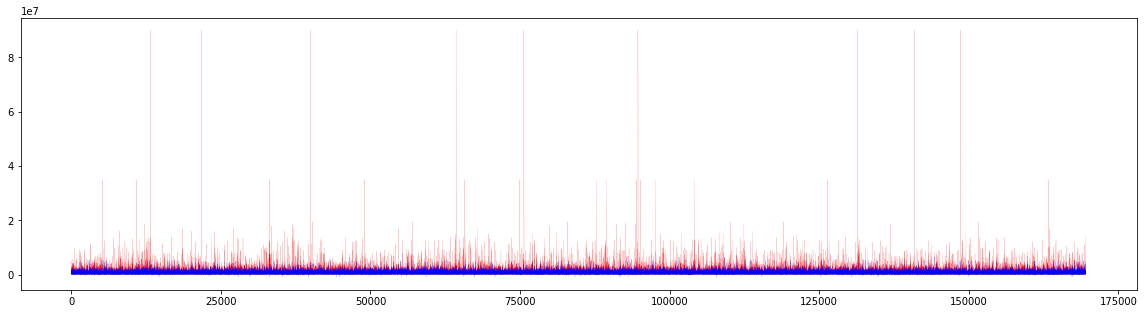

In [70]:

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# Explained variance score: 1 is perfect prediction
print('R2 score: %.2f' % r2_score(y_test, y_pred))

# Plot outputs
plt.figure(figsize=(20, 5))

plt.plot(y_test.values, color='red', linewidth=0.1)
plt.plot(y_pred, color='blue', linewidth=0.1)

### Tree Based Models

It has been well established that bagging and other resampling techniques can be used to reduce the variance in model predictions. As several replicates of the original data set are created using random selection with replacement, at every step, each derivative data set is then used to construct a new model and the models are gathered together into an ensemble. To make a prediction, all of the models in the ensemble are polled and their results are averaged in the case of regression, which is our specific approach.

As well, it has been well established that a powerful modeling algorithm that makes good use of bagging is Random Forests, which works by training numerous decision trees each based on a different resampling of the original training data. The random forest algorithm improves on bagging by training each tree on a random sample of the available features, to prevent each tree from choosing the same predictors.

In Random Forests the bias of the full model is equivalent to the bias of a single decision tree, which itself has high variance. By creating many of these trees, a forest, and then averaging them, the variance of the final model can be greatly reduced over that of a single tree. In practice the only limitation we encountered on the size of the forest is computing time, as an infinite number of trees could be trained without ever increasing bias and with a continual - if asymptotically declining - decrease in the variance.

It is for the aforementioned that we considered Random Forests as a Baseline Ensemble and its constituent, the Decision Tree Regressor as a baseline model as well.

### Decision Trees

Decision trees were implemented as to evaluate the base consituent of the Random Forest ensemble. As per our research on previous models, Random Forest is a very good performance candidate for a baseline ensemble model for Rossmann.

Decision Trees are also evaluated as a non-parametric baseline model, which enriches the comparative analysis of the Linear Regression Models.

For fitting the decision tree model, we do not need to create dummy variables for categorical columns, since trees are able to make use of the factorized category values we created during data cleaning.

### Random Forest

Next we considered Random Forest models. 

In [71]:
# Load libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import train_test_split

# Clean your data
clean_df = df_combined.drop(['listprice'], axis=1)
x_train, X_test, y_train, y_test = train_test_split(clean_df, target, test_size=0.33)

In [72]:
def cv_optimize(clf, parameters, X, y, n_jobs=1, n_folds=5, score_func=None):
    if score_func:
        gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds, n_jobs=n_jobs, scoring=score_func)
    else:
        gs = GridSearchCV(clf, param_grid=parameters, n_jobs=n_jobs, cv=n_folds)
    gs.fit(X, y)

    best = gs.best_estimator_
    return best

#### Parameter Tuning via CV GridSearch

The paramters to be tuned are:

- max_depth
- n_estimartors
- max_features
- random_state

IMPORTANT: This might take a while!!!

In [73]:
#print(X_train)

In [74]:
# tuning n_estimators
parameters = {'max_depth': [8, 9, 10], # [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
              'n_estimators': [10, 20, 30], # [ 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
              'max_features': [None], # [None, 'auto', 'sqrt', 'log2']
              'random_state': [10, 44], # [None, 10, 44, 100]
}
           
rf = RandomForestRegressor(max_depth=1, random_state=10)
optmized_rf_trees = cv_optimize(rf, parameters, x_train, y_train, n_jobs=-1, n_folds=5)

In [75]:
print ('\nThe tuned parameters in the RF w/ customers, via CV grid search are:\n')
print ('Max tree depth: {}\nNumber of Estimators {}\nMax Features: {}\nRandom State {}'.\
                                                                     format(optmized_rf_trees.max_depth,
                                                                     optmized_rf_trees.n_estimators,
                                                                     optmized_rf_trees.max_features,
                                                                     optmized_rf_trees.random_state)) 


The tuned parameters in the RF w/ customers, via CV grid search are:

Max tree depth: 10
Number of Estimators 20
Max Features: None
Random State 44


###### Question 11

In [76]:
#print(x_train)

          zip  beds  baths  sqft  proptype
219647  01085     4    2.0     2         3
223916  02110     3    4.0     4         1
497041  02723     3    2.0     2         2
382697  02631     3    2.0     2         3
463773  01945     4    3.0     3         3
...       ...   ...    ...   ...       ...
179677  02659     3    2.0     2         3
276790  01984     4    3.0     3         3
482331  01840     7    2.0     2         2
484708  01915     6    3.0     3         2
367461  01775     2    2.0     2         3

[344255 rows x 5 columns]
R2 score: -0.21


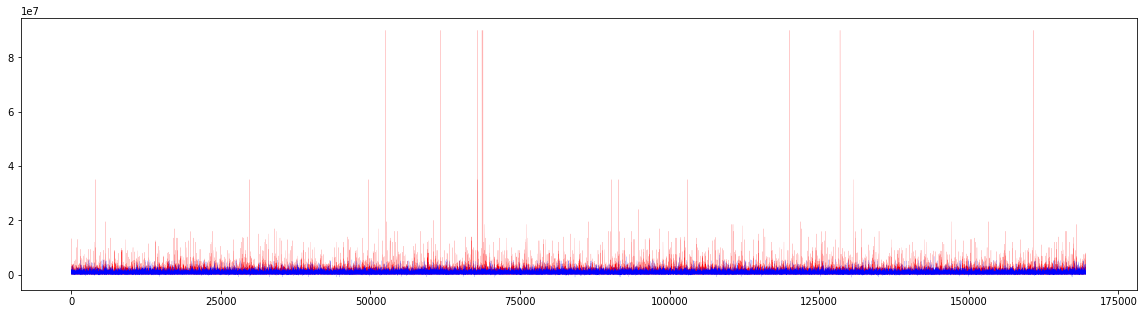

In [77]:
# YOUR CODE
# Run RandomForestRegressor with best params
# Elaborate about given R2 score

rf = RandomForestRegressor(max_depth=10, n_estimators=50, random_state=10)
print(x_train)
rf_fit = rf.fit(x_train, y_train)
score = rf_fit.score(X_test, y_test)

# Explained variance score: 1 is perfect prediction
print('R2 score: %.2f' % r2_score(y_test, y_pred))

# Plot outputs
plt.figure(figsize=(20, 5))

plt.plot(y_test.values, color='red', linewidth=0.1)
plt.plot(y_pred, color='blue', linewidth=0.1)

###### Question 12

#### What is the best model? ** Your answer: **

## Export models 

In our final step, we will choose the best model and explore some important prediction elements. Our app accepts features and gives predictions based on users inputs. Let us see what kind of data input is neccessarry (this is important for you to setup the proper input on the Flask side). 

For example, take one simple observation (we are using first data row):

In [78]:
# Print first row
X_test.iloc[0]

zip         02360
beds            5
baths         3.0
sqft            3
proptype        3
Name: 276404, dtype: object

Predict based on your first row:

In [79]:
X_test.iloc[100]

zip         01255
beds            4
baths         3.0
sqft            3
proptype        3
Name: 260314, dtype: object

In [80]:
zipcode = 2053
beds = 3
baths = 2.0
sqft = 2
proptype = 1
hasotherfeatures = 1
hasproptype = 1
hasstreetname = 1
hashousenum1 = 0
hashousenum2 = 1
hasagentname = 1
hasofficename = 1
hasofficephone = 1
hasshowinginstructions = 1
hasstyle = 1
haslevel = 1
hasgarage = 1
hasheating = 1
hascooling = 0
haselementaryschool = 0
hasjuniorhighschool = 0
hashighschool = 0
haslistprice = 1
haslistdate = 0
hasaddress = 1
hascity = 1
hasstate = 1
hasarea = 1

predict_model_array = [zipcode,beds,baths,sqft,proptype,hasotherfeatures,hasproptype,hasstreetname,hashousenum1,hashousenum2,hasagentname,hasofficename,hasofficephone,hasshowinginstructions,hasstyle,haslevel,hasgarage,hasheating,hascooling,haselementaryschool,hasjuniorhighschool,hashighschool,haslistprice,haslistdate,hasaddress,hascity,hasstate,hasarea]
rf.predict(np.array(predict_model_array).reshape(1, -1))

ValueError: X has 28 features, but RandomForestRegressor is expecting 5 features as input.

In [ ]:
# Test for your app
rf.predict(np.array(X_test.iloc[0].values.reshape(1, -1)))

Similar to the above line:

In [ ]:
rf.predict(np.array([ 2053,3, 2.0,2,1,1, 1, 1,0,1,1,1, 1,1,1,1,1,1, 0,0,0,0,1,0,1,1,1,1]).reshape(1, -1))

We can conclude that your input needs to be **numpy array**. Now, we can export pur model and get ready for the second part of the homework.

In [501]:
import joblib
joblib.dump(rf, 'pp-model.pkl')

['pp-model.pkl']